# Comparación de datos CHIRPS vs CONAGUA

# Conexión al Repositorio de GitHub

In [62]:
import os
if not os.path.isdir('RecNat-Py'):
    !git clone https://github.com/Diegorb1329/RecNat-Py.git
else:
    print("El repositorio ya ha sido clonado.")

%cd RecNat-Py

!pip install -r Requirements.txt

Clonando en 'RecNat-Py'...
remote: Enumerating objects: 6697, done.
remote: Counting objects: 100% (1247/1247), done.
remote: Compressing objects: 100% (1187/1187), done.
^Ccibiendo objetos:  99% (6661/6697), 1.01 GiB | 10.92 MiB/s   
fetch-pack: unexpected disconnect while reading sideband packet
[Errno 2] No such file or directory: 'RecNat-Py'
/Users/DiegoRB/Desktop/Tesis/REPO/RecNat-Py/Varios/CHIRPSvsEM_CONAGUA
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'Requirements.txt'


Crear una carpeta para el almacenamiento temporal de los resultados

In [ ]:
nombre_carpeta = "Salidas de prueba"
ruta_carpeta_trabajo = os.path.join("/content/RecNat-Py", nombre_carpeta)
os.makedirs(ruta_carpeta_trabajo, exist_ok=True)

OSError: [Errno 30] Read-only file system: '/content'

Definición de un municipio de interés para **elegir una estación** a la que realizar la comparación de datos

In [ ]:
# Definir el municipio de interés
municipio_interes = "Texcoco"

In [ ]:
import geopandas as gpd
import pandas as pd


mun_mex = "/content/RecNat-Py/EMS_CONAGUA/Municipios_Mex/muni_2018gw.shp"
mun_mex = gpd.read_file(mun_mex, encoding='utf-8')
municipio_recortado = mun_mex[mun_mex["NOM_MUN"] == municipio_interes]
nombre_carpeta_municipio = municipio_interes
ruta_carpeta_municipio = os.path.join(ruta_carpeta_trabajo, nombre_carpeta_municipio)
os.makedirs(ruta_carpeta_municipio, exist_ok=True)
ruta_archivo_salida = os.path.join(ruta_carpeta_municipio, f"{municipio_interes}.shp")
municipio_recortado.to_file(ruta_archivo_salida)

print("Shp del municipio guardado en: ", ruta_archivo_salida )

DriverError: /content/RecNat-Py/EMS_CONAGUA/Municipios_Mex/muni_2018gw.shp: No such file or directory

In [ ]:
carpeta_datos = "/content/RecNat-Py/EMS_CONAGUA/txts"
df_metadatos = pd.read_csv("/content/RecNat-Py/EMS_CONAGUA/Metadatos/metadatos_final_2.csv")

## Fehcas de inicio y fin del análisis
fecha_inicio = pd.to_datetime("1990-12-01")
fecha_fin = pd.to_datetime("2020-12-31")

Módulo importado correctamente


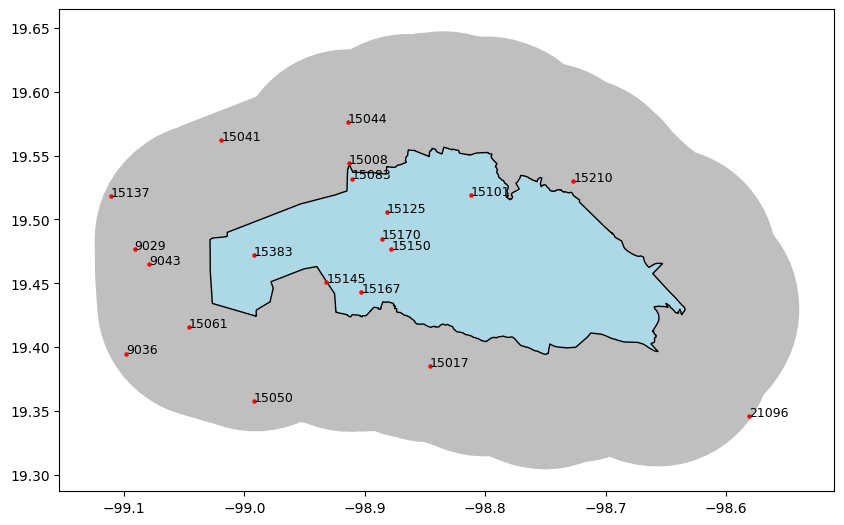

In [ ]:
import sys
sys.path.append('/content/RecNat-Py/EMS_CONAGUA/Funciones')

try:
    import funciones_clim_ems as fcems
    print("Módulo importado correctamente")
except ModuleNotFoundError:
    print("No se pudo encontrar el módulo 'funciones_clim_ems'")

fcems.mapa_estaciones (ruta_archivo_salida, df_metadatos, 1 , "14N", True, 10000)

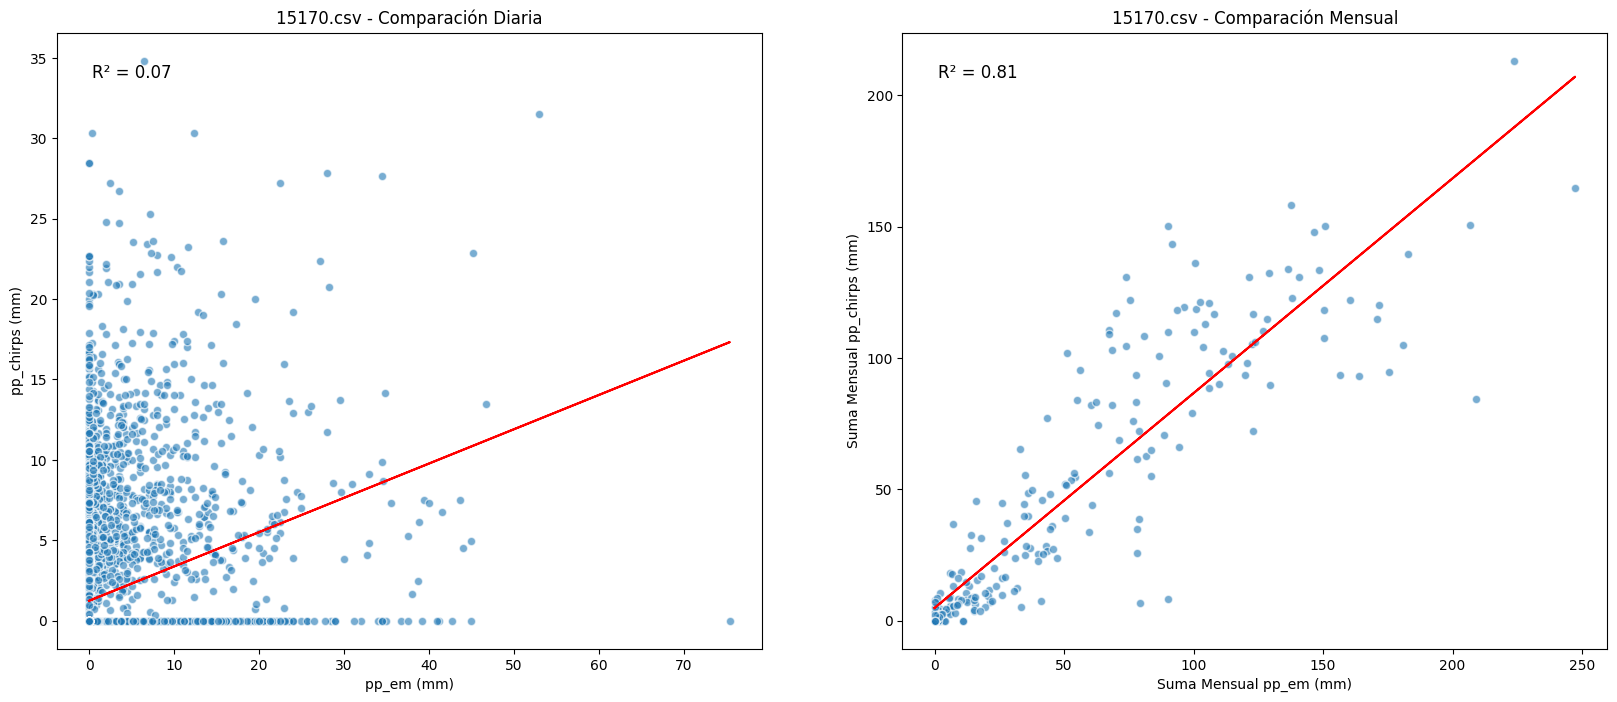

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def plot_combined_pp_comparison(station_filename):
    folder_path = '/content/RecNat-Py/Varios/CHIRPSvsEM_CONAGUA/precip_merged_data/'
    file_path = folder_path + station_filename

    try:
        data = pd.read_csv(file_path)
        data['Fecha'] = pd.to_datetime(data['Fecha'])

        # Limpieza de datos: Eliminar filas con valores nulos o infinitos
        data.replace([np.inf, -np.inf], np.nan, inplace=True)
        data.dropna(subset=['pp_em', 'pp_chirps'], inplace=True)

        monthly_data = data.groupby(pd.Grouper(key='Fecha', freq='M')).sum()

        fig, ax = plt.subplots(1, 2, figsize=(20, 8))

        # Diario
        ax[0].scatter(data['pp_em'], data['pp_chirps'], alpha=0.6, edgecolors='w')
        coef = np.polyfit(data['pp_em'], data['pp_chirps'], 1)
        poly1d_fn = np.poly1d(coef)
        r_squared = r2_score(data['pp_chirps'], poly1d_fn(data['pp_em']))
        ax[0].plot(data['pp_em'], poly1d_fn(data['pp_em']), color="red")
        ax[0].text(0.05, 0.95, f'R² = {r_squared:.2f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')
        ax[0].set_title(f"{station_filename} - Comparación Diaria")
        ax[0].set_xlabel('pp_em (mm)')
        ax[0].set_ylabel('pp_chirps (mm)')

        # Mensual
        ax[1].scatter(monthly_data['pp_em'], monthly_data['pp_chirps'], alpha=0.6, edgecolors='w')
        coef_m = np.polyfit(monthly_data['pp_em'], monthly_data['pp_chirps'], 1)
        poly1d_fn_m = np.poly1d(coef_m)
        r_squared_m = r2_score(monthly_data['pp_chirps'], poly1d_fn_m(monthly_data['pp_em']))
        ax[1].plot(monthly_data['pp_em'], poly1d_fn_m(monthly_data['pp_em']), color="red")
        ax[1].text(0.05, 0.95, f'R² = {r_squared_m:.2f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')
        ax[1].set_title(f"{station_filename} - Comparación Mensual")
        ax[1].set_xlabel('Suma Mensual pp_em (mm)')
        ax[1].set_ylabel('Suma Mensual pp_chirps (mm)')

        plt.show()

    except FileNotFoundError:
        print("El archivo especificado no se encontró en la carpeta designada.")
    except Exception as e:
        print(f"Ocurrió un error al procesar los datos: {e}")

# Ejemplo de cómo llamar a la función
plot_combined_pp_comparison('15170.csv')


Reacomodo de información en un solo df

In [ ]:
import os
import pandas as pd

# Ruta a la carpeta con los archivos CSV
folder_path = '/Users/DiegoRB/Desktop/Tesis/REPO/RecNat-Py/Varios/CHIRPSvsEM_CONAGUA/precip_merged_data'

# Obtener la lista de archivos CSV en la carpeta
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    # Leer el archivo CSV
    data = pd.read_csv(file_path)
    
    # Calcular la diferencia y agregar la nueva columna 'delta'
    data['delta'] = data['pp_em'] - data['pp_chirps']
    
    # Guardar el archivo CSV actualizado
    data.to_csv(file_path, index=False)

print("Se han actualizado todos los archivos CSV con la nueva columna 'delta'.")

Se han actualizado todos los archivos CSV con la nueva columna 'delta'.


In [98]:
import os
import pandas as pd
from tqdm import tqdm  # Para la barra de estado

# Ruta a la carpeta con los archivos CSV
folder_path = '/Users/DiegoRB/Desktop/Tesis/REPO/RecNat-Py/Varios/CHIRPSvsEM_CONAGUA/precip_merged_data'
metadata_path = '/Users/DiegoRB/Desktop/Tesis/REPO/RecNat-Py/EMS_CONAGUA/Metadatos/metadatos_final_2.csv'

metadata = pd.read_csv(metadata_path)

result_df = pd.DataFrame(columns=['ID', 'Fecha', 'TMin', 'TMax', 'Latitud', 'Longitud', 'Altitud', 'pp_em', 'pp_chirps'])

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Usar tqdm para la barra de estado
for file in tqdm(csv_files, desc="Procesando archivos CSV"):
    file_path = os.path.join(folder_path, file)
    
    # Leer el archivo CSV
    data = pd.read_csv(file_path)
    data['Fecha'] = pd.to_datetime(data['Fecha'])
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.dropna(subset=['pp_em', 'pp_chirps'], inplace=True)
    
    if data.empty:
        print(f"El archivo {file} está vacío después de limpiar los datos.")
        continue
    
    # Acumular precipitación mensual y promediar temperaturas mensuales
    monthly_data = data.set_index('Fecha').resample('ME').agg({
        'pp_em': 'sum',
        'pp_chirps': 'sum',
        'TMin': 'mean',
        'TMax': 'mean'
    })

    station_id = file.split('.')[0]
    station_metadata = metadata[metadata['estacion'] == int(station_id)]
    
    if station_metadata.empty:
        print(f"No se encontró metadata para la estación {station_id}.")
        continue
    
    latitud = station_metadata['latitud'].values[0]
    longitud = station_metadata['longitud'].values[0]
    altitud = station_metadata['altitud'].values[0]
    
    temp_df = monthly_data.reset_index()
    temp_df['ID'] = station_id
    temp_df['Fecha'] = temp_df['Fecha'].dt.strftime('%m/%Y')
    temp_df['Latitud'] = latitud
    temp_df['Longitud'] = longitud
    temp_df['Altitud'] = altitud
    
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

# Verificar el contenido de result_df
print(result_df.head())

Procesando archivos CSV:   0%|          | 0/1058 [00:00<?, ?it/s]/var/folders/6b/r533rttx6l93mhp9c5fpkg_h0000gp/T/ipykernel_1043/76044602.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, temp_df], ignore_index=True)
Procesando archivos CSV:   7%|▋         | 73/1058 [00:02<00:29, 32.86it/s]

El archivo 04014.csv está vacío después de limpiar los datos.


Procesando archivos CSV:  40%|███▉      | 423/1058 [00:14<00:21, 29.39it/s]

El archivo 03045.csv está vacío después de limpiar los datos.


Procesando archivos CSV:  57%|█████▋    | 601/1058 [00:21<00:16, 26.93it/s]

El archivo 31010.csv está vacío después de limpiar los datos.


Procesando archivos CSV: 100%|██████████| 1058/1058 [00:42<00:00, 24.66it/s]

      ID    Fecha       TMin       TMax  Latitud  Longitud    Altitud  pp_em  \
0  21242  01/2000   5.645161  27.548387   19.093   -98.059  2435 msnm    0.0   
1  21242  02/2000   6.964286  27.071429   19.093   -98.059  2435 msnm    3.0   
2  21242  03/2000   9.774194  27.419355   19.093   -98.059  2435 msnm    0.0   
3  21242  04/2000   9.607143  27.821429   19.093   -98.059  2435 msnm   24.0   
4  21242  05/2000  11.481481  26.444444   19.093   -98.059  2435 msnm   57.7   

   pp_chirps  
0  11.312164  
1  13.126028  
2  10.469156  
3  23.144749  
4  76.956851  


In [101]:
stats_df = result_df[['pp_em', 'pp_chirps', "TMin", "TMax", "Altitud"]].describe()
print(stats_df)

               pp_em      pp_chirps           TMin           TMax
count  265102.000000  265102.000000  234960.000000  234843.000000
mean       47.813267      65.937420      11.229909      26.444117
std      2542.143824      93.490783     175.787762     178.768499
min   -699990.500000       0.000000  -41934.451613  -38693.225806
25%         0.000000       5.152398       8.034483      24.129032
50%        20.500000      22.906999      12.750000      28.209677
75%        94.100000      96.404686      17.866667      32.250000
max      3547.700000    1298.683613      35.741935      48.850000


In [102]:
# Definir los umbrales mínimo y máximo
min_threshold = 0
max_threshold = 4000

# Filtrar los valores de 'Registro (delta)' que están fuera del rango definido por los umbrales
outside_threshold = result_df[(result_df['pp_em'] < min_threshold) | (result_df['pp_em'] > max_threshold)]

# Contar los valores
count_outside_threshold = outside_threshold.shape[0]

# Mostrar el conteo y los valores
print(f"Cantidad de valores fuera del rango [{min_threshold}, {max_threshold}]: {count_outside_threshold}")
print(f"Valores fuera del rango [{min_threshold}, {max_threshold}]:")
print(outside_threshold)

Cantidad de valores fuera del rango [0, 4000]: 23
Valores fuera del rango [0, 4000]:
           ID    Fecha          TMin          TMax  Latitud  Longitud  \
143067  10180  11/2000  -3329.250000  -3311.000000  26.4105 -105.5027   
143164  10180  12/2008  -5555.444444 -11091.388889  26.4105 -105.5027   
143167  10180  03/2009  -6449.370968  -6429.977419  26.4105 -105.5027   
143168  10180  04/2009  -4340.673913  -4320.304348  26.4105 -105.5027   
143169  10180  05/2009 -25917.037037 -25900.111111  26.4105 -105.5027   
143171  10180  07/2009  -6883.051724 -10314.689655  26.4105 -105.5027   
143172  10180  08/2009 -16116.354839 -12875.483871  26.4105 -105.5027   
143173  10180  09/2009  -6654.633333  -6639.933333  26.4105 -105.5027   
143175  10180  11/2009  -3447.517241  -3424.444828  26.4105 -105.5027   
143176  10180  12/2009 -16666.783333 -16649.950000  26.4105 -105.5027   
143177  10180  01/2010 -16665.875000 -12483.041667  26.4105 -105.5027   
143179  10180  03/2010  -3218.903226  -

In [105]:
#Eliminar registros donde TMax sea mayor a TMin
result_df = result_df[result_df['TMax'] > result_df['TMin']]
#Revisar la cantidad de registros eliminados
print(f"Cantidad de registros eliminados: {result_df.shape[0] - result_df.shape[0]}")

Cantidad de registros eliminados: 0


In [106]:
#Eliminar registros donde TMax sea mayor a 70 y Tmin menor a -30 grados
result_df = result_df[result_df['TMax'] < 70]
result_df = result_df[result_df['TMin'] > -30]
#Revisar la cantidad de registros eliminados
print(f"Cantidad de registros eliminados: {result_df.shape[0] - result_df.shape[0]}")

Cantidad de registros eliminados: 0


               pp_em      pp_chirps
count  234217.000000  234217.000000
mean       73.543471      72.250241
std       110.385107      95.353294
min         0.000000       0.000000
25%         1.500000       7.556015
50%        28.900000      30.285467
75%       104.800000     107.005118
max      3547.700000    1298.683613


/var/folders/6b/r533rttx6l93mhp9c5fpkg_h0000gp/T/ipykernel_1043/3506800805.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([result_df['pp_em'], result_df['pp_chirps']], labels=['pp_em', 'pp_chirps'], patch_artist=True)


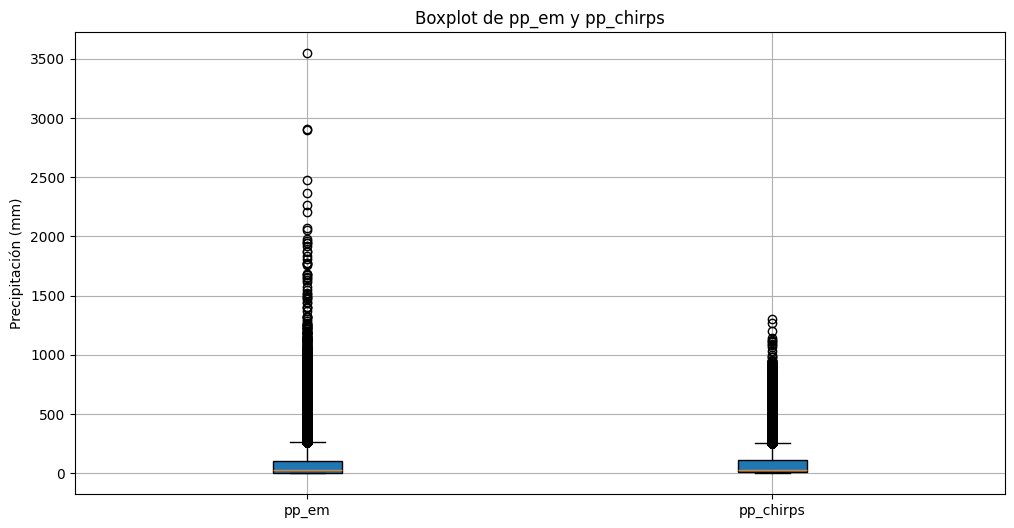

In [107]:
import matplotlib.pyplot as plt
# Eliminar la estación con ID 10180
result_df = result_df[result_df['ID'] != '10180']

# Calcular las estadísticas básicas de 'pp_em' y 'pp_chirps'
stats_df = result_df[['pp_em', 'pp_chirps']].describe()

print(stats_df)

# Crear el plot con dos boxplots
plt.figure(figsize=(12, 6))
plt.boxplot([result_df['pp_em'], result_df['pp_chirps']], labels=['pp_em', 'pp_chirps'], patch_artist=True)
plt.title('Boxplot de pp_em y pp_chirps')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()

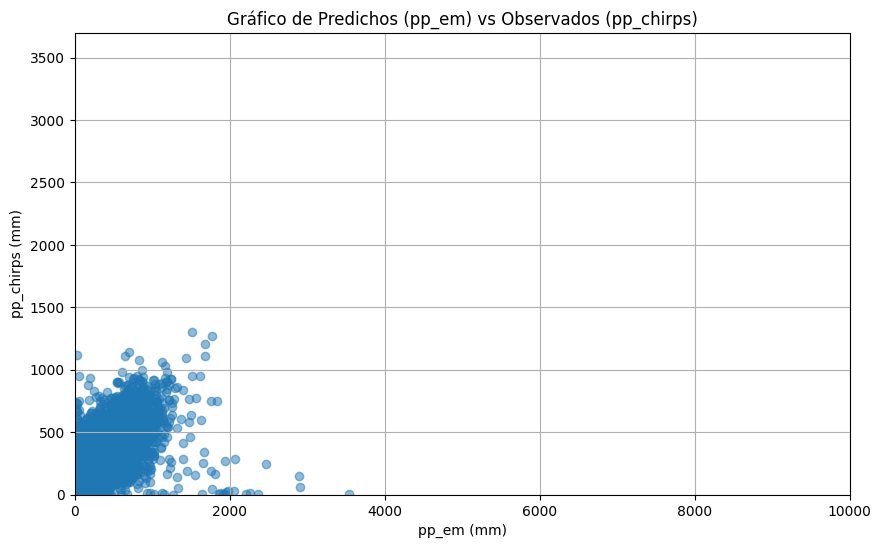

In [108]:
#gráfico de predichos (pp_em) vs observados (pp_chirps) con eje x de 0 a 3500 y eje y de 0 a 3500
plt.figure(figsize=(10, 6))
plt.scatter(result_df['pp_em'], result_df['pp_chirps'], alpha=0.5)
plt.title('Gráfico de Predichos (pp_em) vs Observados (pp_chirps)')
plt.xlabel('pp_em (mm)')
plt.ylabel('pp_chirps (mm)')
plt.xlim(0, 10000)
plt.ylim(0, 3700)
plt.grid(True)
plt.show()

#gráfico de predichos (pp_em) vs observados (pp_chirps)

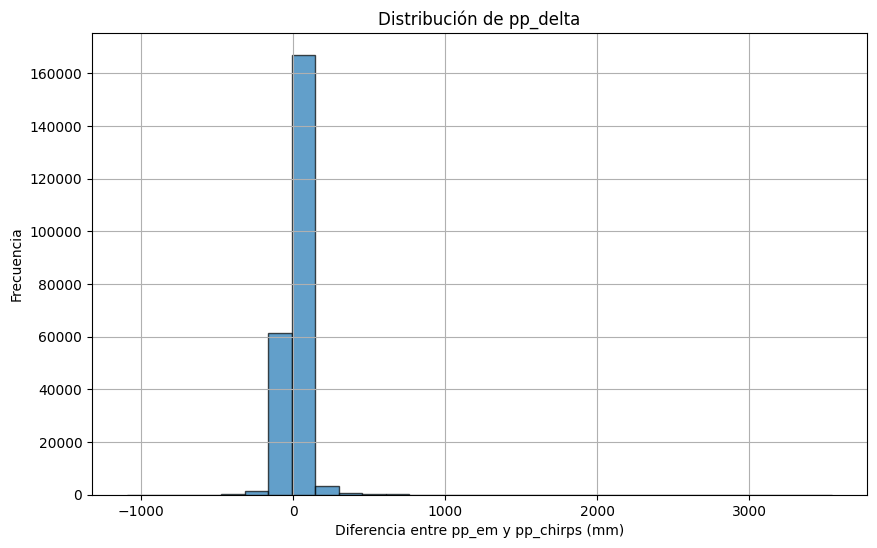

In [109]:
# Calcular la diferencia entre 'pp_chirps' y 'pp_em' y agregar la columna 'pp_delta' con el eje y hasta 2000

result_df['pp_delta'] = result_df['pp_em'] - result_df['pp_chirps']

# Crear el histograma de la distribución de 'pp_delta'
plt.figure(figsize=(10, 6))
plt.hist(result_df['pp_delta'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de pp_delta')
plt.xlabel('Diferencia entre pp_em y pp_chirps (mm)')
plt.ylabel('Frecuencia')
plt.grid(True)

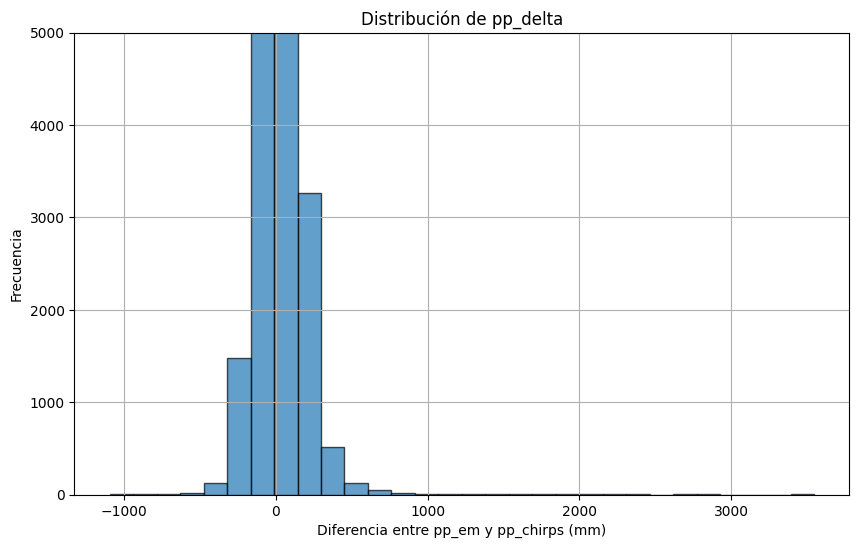

In [110]:
# Calcular la diferencia entre 'pp_chirps' y 'pp_em' y agregar la columna 'pp_delta' con el eje y hasta 2000

result_df['pp_delta'] = result_df['pp_em'] - result_df['pp_chirps']

# Crear el histograma de la distribución de 'pp_delta'
plt.figure(figsize=(10, 6))
plt.hist(result_df['pp_delta'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de pp_delta')
plt.xlabel('Diferencia entre pp_em y pp_chirps (mm)')
plt.ylabel('Frecuencia')
plt.ylim(0, 5000)
plt.grid(True)

In [111]:
# Ajustar la columna de altura para verificar que solo incluya el int, excluir "msnm"
result_df['Altitud'] = result_df['Altitud'].str.replace('msnm', '').astype(int)
result_df['Longitud'].describe()

count    234217.000000
mean       -100.592046
std           5.266198
min        -116.908000
25%        -102.950000
50%         -99.915000
75%         -98.371000
max         -86.946000
Name: Longitud, dtype: float64

In [121]:
#cambiar nombre de columna pp_delta a residuo
result_df.rename(columns={'pp_delta': 'residuo'}, inplace=True)
print(result_df.head())

      ID      Fecha       TMin       TMax  Latitud  Longitud  Altitud  pp_em  \
0  21242 2000-01-01   5.645161  27.548387   19.093   -98.059     2435    0.0   
1  21242 2000-02-01   6.964286  27.071429   19.093   -98.059     2435    3.0   
2  21242 2000-03-01   9.774194  27.419355   19.093   -98.059     2435    0.0   
3  21242 2000-04-01   9.607143  27.821429   19.093   -98.059     2435   24.0   
4  21242 2000-05-01  11.481481  26.444444   19.093   -98.059     2435   57.7   

   pp_chirps    residuo  Mes   Año  
0  11.312164 -11.312164    1  2000  
1  13.126028 -10.126028    2  2000  
2  10.469156 -10.469156    3  2000  
3  23.144749   0.855251    4  2000  
4  76.956851 -19.256851    5  2000  


In [122]:
#Guardar el df resultante en un archivo csv
result_df.to_csv('/Users/DiegoRB/Desktop/Tesis/REPO/RecNat-Py/Varios/CHIRPSvsEM_CONAGUA/result_df.csv', index=False)

In [2]:
#importar el df resultante
import pandas as pd
result_df = pd.read_csv('/Users/DiegoRB/Desktop/Tesis/REPO/RecNat-Py/Varios/CHIRPSvsEM_CONAGUA/result_df.csv')
result_df.head()

,ID,Fecha,TMin,TMax,Latitud,Longitud,Altitud,pp_em,pp_chirps,residuo,Mes,Año
0,21242,2000-01-01,5.645161,27.548387,19.093,-98.059,2435,0.0,11.312164,-11.312164,1,2000
1,21242,2000-02-01,6.964286,27.071429,19.093,-98.059,2435,3.0,13.126028,-10.126028,2,2000
2,21242,2000-03-01,9.774194,27.419355,19.093,-98.059,2435,0.0,10.469156,-10.469156,3,2000
3,21242,2000-04-01,9.607143,27.821429,19.093,-98.059,2435,24.0,23.144749,0.855251,4,2000
4,21242,2000-05-01,11.481481,26.444444,19.093,-98.059,2435,57.7,76.956851,-19.256851,5,2000


In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(result_df['pp_em'], result_df['pp_chirps'])
print(f'Error Absoluto Medio (MAE): {mae:.2f} mm')

# Calcular el Error Cuadrático Medio (MSE) y su raíz cuadrada (RMSE)
mse = mean_squared_error(result_df['pp_em'], result_df['pp_chirps'])
rmse = np.sqrt(mse)
print(f'Error Cuadrático Medio (MSE): {mse:.2f} mm^2')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f} mm')

Error Absoluto Medio (MAE): 28.40 mm
Error Cuadrático Medio (MSE): 3369.01 mm^2
Raíz del Error Cuadrático Medio (RMSE): 58.04 mm


In [4]:
result_df = result_df[result_df['ID'] != '10180']

# Calcular las estadísticas básicas de 'pp_em' y 'pp_chirps'
stats_df = result_df[['pp_em', 'pp_chirps']].describe()

print(stats_df)

               pp_em      pp_chirps
count  234217.000000  234217.000000
mean       73.543471      72.250241
std       110.385107      95.353294
min         0.000000       0.000000
25%         1.500000       7.556015
50%        28.900000      30.285467
75%       104.800000     107.005118
max      3547.700000    1298.683613


In [5]:
#revisar formato de la columna fecha
print(result_df['Fecha'].dtype)

object


In [6]:
#convertir la columna fecha a formato datetime
result_df['Fecha'] = pd.to_datetime(result_df['Fecha'])
#revisar el formato de la columna fecha
print(result_df['Fecha'].dtype)

datetime64[ns]


In [7]:
# Convertir la columna 'Fecha' a datetime y extraer el mes y el año
result_df['Fecha'] = pd.to_datetime(result_df['Fecha'], format='%m/%Y')

# Extraer el mes y el año utilizando el accesor .dt
result_df['Mes'] = result_df['Fecha'].dt.month
result_df['Año'] = result_df['Fecha'].dt.year
print(result_df.head())


      ID      Fecha       TMin       TMax  Latitud  Longitud  Altitud  pp_em  \
0  21242 2000-01-01   5.645161  27.548387   19.093   -98.059     2435    0.0   
1  21242 2000-02-01   6.964286  27.071429   19.093   -98.059     2435    3.0   
2  21242 2000-03-01   9.774194  27.419355   19.093   -98.059     2435    0.0   
3  21242 2000-04-01   9.607143  27.821429   19.093   -98.059     2435   24.0   
4  21242 2000-05-01  11.481481  26.444444   19.093   -98.059     2435   57.7   

   pp_chirps    residuo  Mes   Año  
0  11.312164 -11.312164    1  2000  
1  13.126028 -10.126028    2  2000  
2  10.469156 -10.469156    3  2000  
3  23.144749   0.855251    4  2000  
4  76.956851 -19.256851    5  2000  


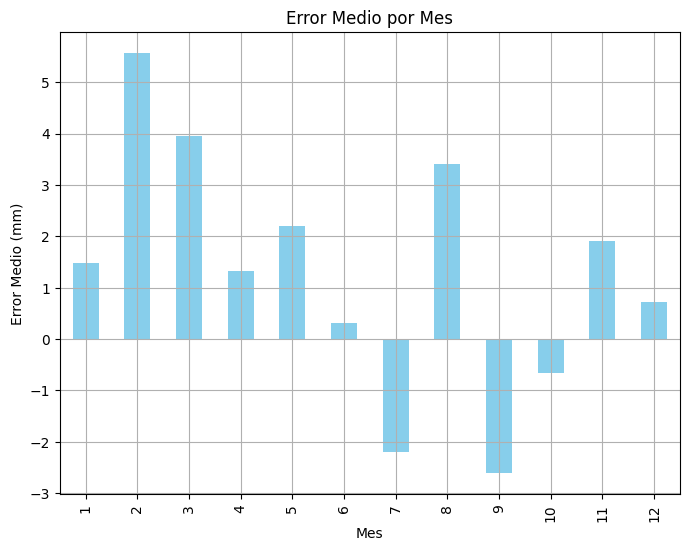

In [9]:
import matplotlib.pyplot as plt
# Calcular el error medio por mes
error_por_mes = result_df.groupby('Mes')['residuo'].mean()

# Visualizar el error medio por mes
plt.figure(figsize=(8, 6))
error_por_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Error Medio (mm)')
plt.title('Error Medio por Mes')
plt.grid(True)
plt.show()


In [10]:
# error medio por mes tabular
print(error_por_mes)

Mes
1     1.487345
2     5.569411
3     3.947080
4     1.326328
5     2.209211
6     0.304684
7    -2.201624
8     3.401707
9    -2.607044
10   -0.660664
11    1.917956
12    0.726212
Name: residuo, dtype: float64


In [11]:
correlation = result_df['pp_em'].corr(result_df['pp_chirps'])
print(f'Coeficiente de correlación de Pearson: {correlation:.2f}')
bias = result_df['residuo'].mean()
print(f'Sesgo Medio: {bias:.2f} mm')


Coeficiente de correlación de Pearson: 0.85
Sesgo Medio: 1.29 mm


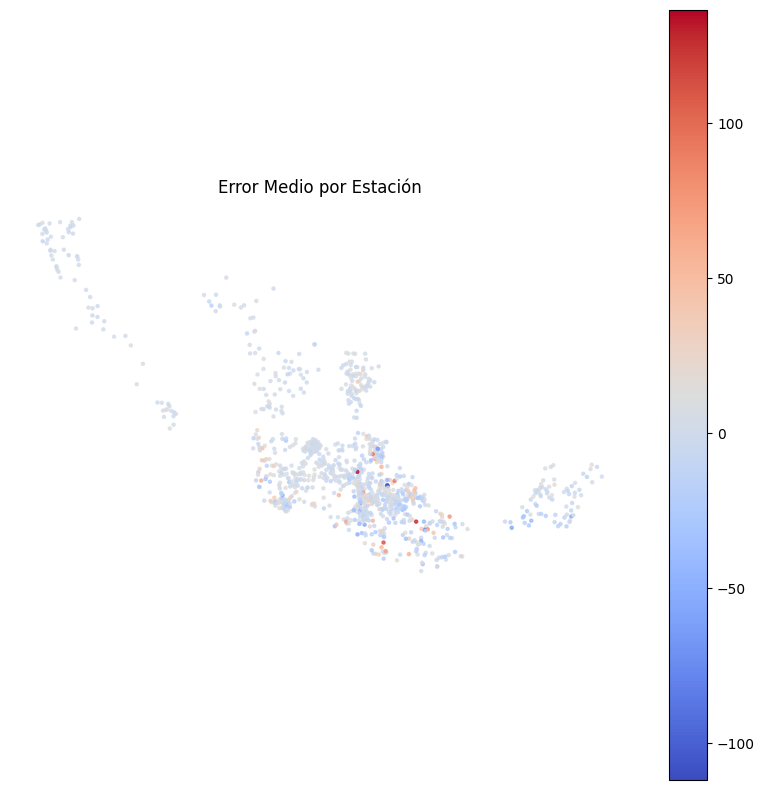

In [12]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import xyzservices.providers as xyz  # Importar xyzservices

# Crear una GeoDataFrame a partir de result_df
geometry = [Point(xy) for xy in zip(result_df['Longitud'], result_df['Latitud'])]
gdf = gpd.GeoDataFrame(result_df, geometry=geometry, crs="EPSG:4326")

# Calcular el error medio por estación
error_por_estacion = gdf.groupby(['ID', 'Latitud', 'Longitud'])['residuo'].mean().reset_index()

# Crear una GeoDataFrame de los errores medios
geometry = [Point(xy) for xy in zip(error_por_estacion['Longitud'], error_por_estacion['Latitud'])]
gdf_error = gpd.GeoDataFrame(error_por_estacion, geometry=geometry, crs="EPSG:4326")

# Convertir a proyección métrica (Web Mercator) para agregar mapas base
gdf_error = gdf_error.to_crs(epsg=3857)

# Plotear el mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf_error.plot(column='residuo', cmap='coolwarm', legend=True, ax=ax, markersize=5, alpha=0.7)
#reducir tamaño de la leyenda

ax.set_title('Error Medio por Estación')
ax.axis('off')
plt.show()


In [13]:
residuo_min = result_df['residuo'].min()
residuo_max = result_df['residuo'].max()
print(f"Residuo mínimo: {residuo_min}")
print(f"Residuo máximo: {residuo_max}")


Residuo mínimo: -1092.9445457458496
Residuo máximo: 3545.467411708832


In [14]:
# Calcular cuántos datos hay por debajo y por encima del 99.95% de los datos
lower_percentile = result_df['residuo'].quantile(0.0005)  # 0.05%
higher_percentile = result_df['residuo'].quantile(0.9995)  # 99.95%
print(f"Residuo mínimo: {lower_percentile}")
print(f"Residuo máximo: {higher_percentile}")
print(f"Datos por debajo del 005º percentil: {result_df[result_df['residuo'] < lower_percentile].shape[0]}")
print(f"Datos por encima del 995º percentil: {result_df[result_df['residuo'] > higher_percentile].shape[0]}")

Residuo mínimo: -339.0673797401428
Residuo máximo: 575.0161518730362
Datos por debajo del 005º percentil: 118
Datos por encima del 995º percentil: 118


In [15]:
# Para esos datos, mostrar el valor para chirps y em en un df aparte
df_outliers = result_df[(result_df['residuo'] < lower_percentile) | (result_df['residuo'] > higher_percentile)]
print(df_outliers)

           ID      Fecha       TMin       TMax  Latitud  Longitud  Altitud  \
301     22005 2018-03-01  11.887097  30.870968   20.851   -99.588     2728   
614     20174 2006-08-01  22.161290  32.741935   17.883   -96.533      127   
655     20174 2011-07-01  20.677419  31.387097   17.883   -96.533      127   
682     20174 2013-10-01  17.677419  29.225806   17.883   -96.533      127   
3265    13031 2018-08-01  11.483871  25.064516   20.044   -98.368     2179   
...       ...        ...        ...        ...      ...       ...      ...   
234188  22034 2018-06-01  13.566667  36.366667   20.742   -99.942     2061   
234189  22034 2018-07-01  12.709677  35.709677   20.742   -99.942     2061   
234190  22034 2018-08-01  13.645161  34.935484   20.742   -99.942     2061   
234191  22034 2018-09-01  13.900000  35.766667   20.742   -99.942     2061   
234192  22034 2018-10-01  13.225806  33.612903   20.742   -99.942     2061   

         pp_em   pp_chirps      residuo  Mes   Año  
301     19

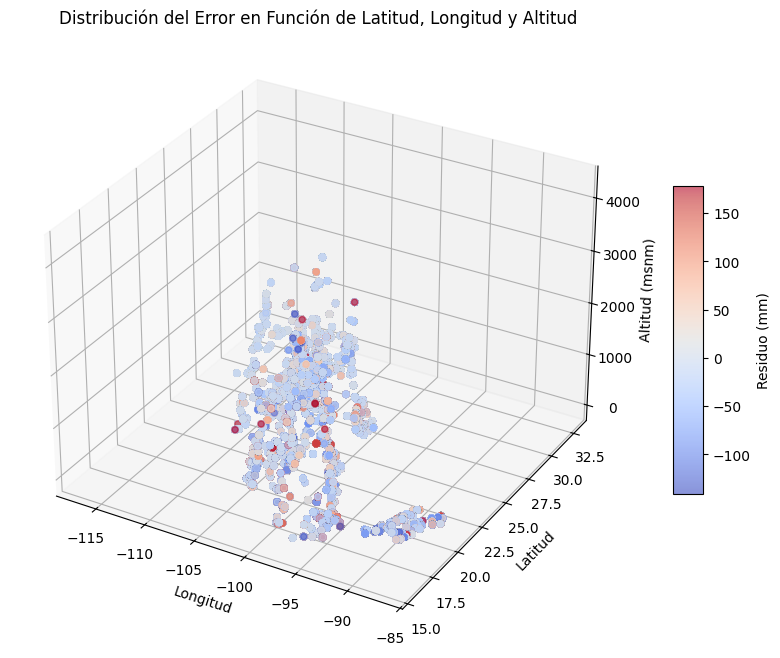

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calcular el residuo si no lo has hecho
result_df['residuo'] = result_df['pp_em'] - result_df['pp_chirps']

# Definir los percentiles como límites para la paleta de colores
vmin = -141.30  # 1º percentil
vmax = 178.16   # 99º percentil

# Variables para los ejes
X = result_df['Longitud']
Y = result_df['Latitud']
Z = result_df['Altitud']
C = result_df['residuo']

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear el scatter plot 3D con los límites ajustados
scatter = ax.scatter(X, Y, Z, c=C, cmap='coolwarm', s=20, alpha=0.6, vmin=vmin, vmax=vmax)

# Agregar etiquetas y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Altitud (msnm)')
ax.set_title('Distribución del Error en Función de Latitud, Longitud y Altitud')

# Agregar una barra de color
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Residuo (mm)')

# Mostrar el gráfico
plt.show()


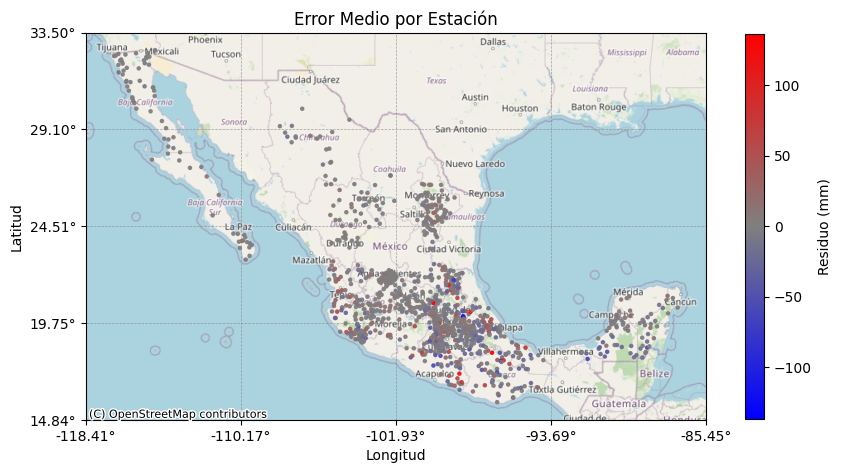

In [49]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import xyzservices.providers as xyz
import numpy as np
from pyproj import Transformer
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# (Código previo para crear gdf_error...)

# Crear la paleta de colores personalizada
colors = [
    (0, 0, 1),        # Azul para valores negativos
    (0.5, 0.5, 0.5),  # Gris para cero
    (1, 0, 0)         # Rojo para valores positivos
]
cmap = LinearSegmentedColormap.from_list('BlueGrayRed', colors, N=256)

# Calcular el valor máximo absoluto del residuo
residuo_min = gdf_error['residuo'].min()
residuo_max = gdf_error['residuo'].max()
abs_residuo_max = max(abs(residuo_min), abs(residuo_max))

# Configurar la normalización centrada en cero
norm = TwoSlopeNorm(vmin=-abs_residuo_max, vcenter=0, vmax=abs_residuo_max)

# Plotear el mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear los datos con la paleta y normalización personalizada
gdf_error.plot(
    column='residuo',
    cmap=cmap,
    norm=norm,
    legend=True,
    legend_kwds={
        'shrink': 0.5,
        'label': 'Residuo (mm)',
        'orientation': 'vertical'
    },
    ax=ax,
    markersize=5,
    alpha=0.9
)

# Agregar mapa base
ctx.add_basemap(ax, source=xyz.OpenStreetMap.Mapnik)

# Añadir cuadrícula
ax.grid(True, which='both', color='gray', linewidth=0.5, linestyle='--', alpha=0.7)

# Configurar las etiquetas de los ejes para que muestren grados en lugar de metros
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
num_ticks = 5
xticks = np.linspace(xmin, xmax, num_ticks)
yticks = np.linspace(ymin, ymax, num_ticks)
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326", always_xy=True)
xticks_deg, yticks_deg = transformer.transform(xticks, yticks)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([f"{lon:.2f}°" for lon in xticks_deg])
ax.set_yticklabels([f"{lat:.2f}°" for lat in yticks_deg])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

ax.set_title('Error Medio por Estación')
ax.axis('on')
plt.show()


In [153]:
# Hacer un modelo de random forest que tenga en cuenta la longitud, latitud, altitud, Tmin y Tmax para predecir el residuo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X = result_df[['Latitud', "Longitud", 'Altitud', 'TMin', 'TMax', "Mes", "Año",]]

y = result_df['residuo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)         

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)


In [45]:
# Hacer un modelo de random forest que tenga en cuenta la longitud, latitud, altitud, Tmin y Tmax para predecir el residuo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  # Importar StandardScaler

# Dividir los datos en conjuntos de entrenamiento y prueba
X = result_df[['TMin', 'TMax', "Mes", "Año",]]
y = result_df['residuo']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizar el residuo
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)   

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=500, max_depth=20, min_samples_split=5)
# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Desnormalizar las predicciones
y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

In [46]:
#Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Cuadrático Medio (MSE): 0.97
Raíz del Error Cuadrático Medio (RMSE): 0.98
Error Absoluto Medio (MAE): 0.51
Coeficiente de Determinación (R^2): 0.00


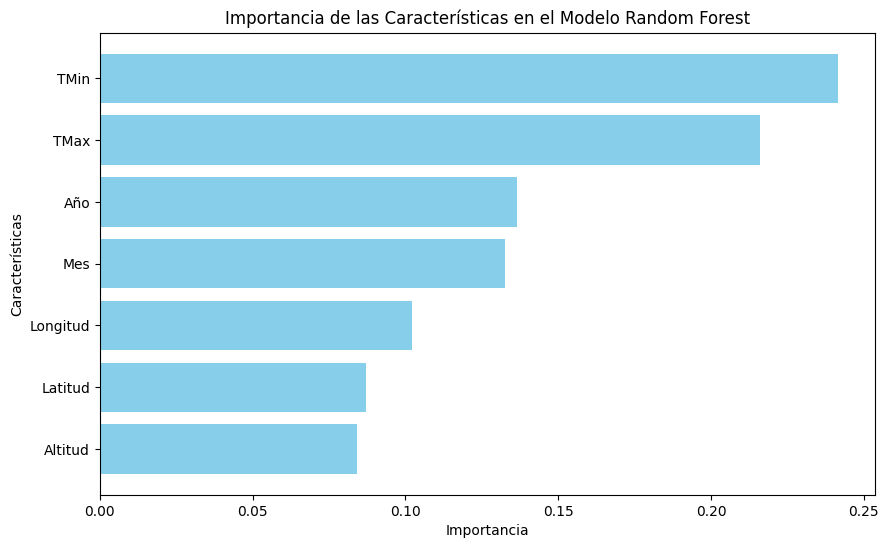

In [44]:
# Obtener las importancias de las características
importances = rf_model.feature_importances_

# Crear un DataFrame con los nombres de las características y sus importancias
features = X.columns
importances_df = pd.DataFrame({'Características': features, 'Importancia': importances})

# Ordenar las importancias de mayor a menor
importances_df = importances_df.sort_values(by='Importancia', ascending=False)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Características'], importances_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las características más importantes estén en la parte superior
plt.show()

In [40]:
# Importar el modelo y la métrica de evaluación
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import RandomizedSearchCV

# Definir el espacio de búsqueda
param_distributions = {
    'n_estimators': [200, 500, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_samples': [0.5, 0.75, None]
}


# Instanciar el modelo base
rf = RandomForestRegressor(random_state=42)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada con 5 particiones
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Ejecutar la búsqueda aleatoria
random_search.fit(X_train, y_train.ravel())

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=30, max_features=auto, max_samples=0.75, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s[CV] END bootstrap=False, max_depth=30, max_features=auto, max_samples=0.75, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s

[CV] END bootstrap=False, max_depth=30, max_features=auto, max_samples=0.75, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s[CV] END bootstrap=False, max_depth=30, max_features=auto, max_samples=0.75, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s[CV] END bootstrap=False, max_depth=30, max_features=auto, max_samples=0.75, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s




KeyboardInterrupt: 

In [23]:

import torchq
import torch
 # Ver los devices con CUDA
print(torch.cuda.is_available())



False


In [31]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Para visualización (opcional)
import matplotlib.pyplot as plt


# Seleccionar las características y el objetivo
X = result_df[['Latitud', 'Longitud', 'Altitud', 'TMin', 'TMax', 'Mes', 'Año']]
y = result_df['residuo'].values

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a tensores de PyTorch y mover al dispositivo
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(device)

y = result_df['residuo'].values.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32).to(device)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.3, random_state=42
)

# **3. Definir la red neuronal profunda**

class DeepNeuralNet(nn.Module):
    def __init__(self):
        super(DeepNeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(7, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
        
    def forward(self, x):
        return self.model(x)

# Instanciar el modelo y moverlo al dispositivo
model = DeepNeuralNet().to(device)

# **4. Configurar la función de pérdida y el optimizador**

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

# **5. Configurar el entrenamiento**

# Parámetros de entrenamiento
num_epochs = 500
batch_size = 128

# Crear DataLoader para manejar los lotes
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Listas para almacenar las pérdidas
train_losses = []
val_losses = []

In [32]:
# **6. Entrenamiento con visualización en tiempo real en VS Code**

for epoch in range(num_epochs):
    # Modo de entrenamiento
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        # Mover los datos al dispositivo
        data = data.to(device)
        target = target.to(device)
        
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    
    # Modo de evaluación para validación
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        val_loss_value = val_loss.item()
    
    train_losses.append(avg_train_loss)
    val_losses.append(val_loss_value)
    
    # Visualización en tiempo real en la consola
    if (epoch+1) % 2 == 0 or epoch == 0:
        print(f'Época [{epoch+1}/{num_epochs}], Pérdida de Entrenamiento: {avg_train_loss:.4f}, Pérdida de Validación: {val_loss_value:.4f}')


Época [1/500], Pérdida de Entrenamiento: 1.0066, Pérdida de Validación: 0.9587
Época [2/500], Pérdida de Entrenamiento: 1.0010, Pérdida de Validación: 0.9522
Época [4/500], Pérdida de Entrenamiento: 0.9897, Pérdida de Validación: 0.9408
Época [6/500], Pérdida de Entrenamiento: 0.9825, Pérdida de Validación: 0.9266
Época [8/500], Pérdida de Entrenamiento: 0.9761, Pérdida de Validación: 0.9237
Época [10/500], Pérdida de Entrenamiento: 0.9695, Pérdida de Validación: 0.9166
Época [12/500], Pérdida de Entrenamiento: 0.9643, Pérdida de Validación: 0.9168
Época [14/500], Pérdida de Entrenamiento: 0.9547, Pérdida de Validación: 0.9031
Época [16/500], Pérdida de Entrenamiento: 0.9526, Pérdida de Validación: 0.8920
Época [18/500], Pérdida de Entrenamiento: 0.9470, Pérdida de Validación: 0.8955
Época [20/500], Pérdida de Entrenamiento: 0.9369, Pérdida de Validación: 0.8898
Época [22/500], Pérdida de Entrenamiento: 0.9368, Pérdida de Validación: 0.8872
Época [24/500], Pérdida de Entrenamiento: 0.9

In [33]:
# Evaluación final en el conjunto de prueba
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'\nPérdida en el Conjunto de Prueba: {test_loss.item():.4f}')

# Transformar las predicciones y los valores reales a la escala original
y_pred_original = y_scaler.inverse_transform(y_pred.cpu().numpy())
y_test_original = y_scaler.inverse_transform(y_test.cpu().numpy())

# Calcular métricas adicionales
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'Coeficiente de Determinación R^2: {r2:.4f}')
print(f'Error Medio Absoluto (MAE): {mae:.4f}')



Pérdida en el Conjunto de Prueba: 0.8229
Coeficiente de Determinación R^2: 0.1519
Error Medio Absoluto (MAE): 27.4432


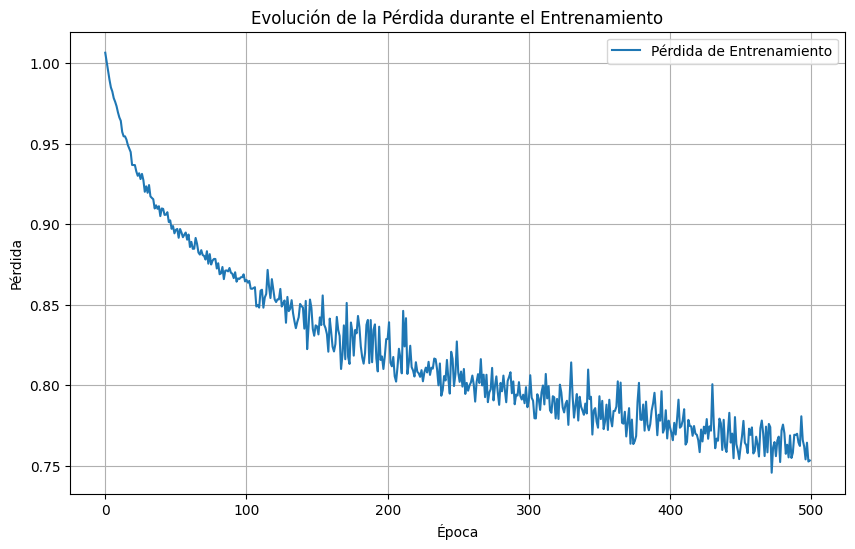

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Pérdida de Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()
